# Time Series

* Time series is an ordered sequence of time stamp values at equally spaced intervals.


* Time series Analysis is used in many applications such as sales forecasting, utility studies, budget analysis, economic forecasting, inventory studies...


* Time series data is in the form of a sequence of qualitative observations about a system or process and is made at successive points in time.

* Time seies is a <b>collection of observations </b> made <b>sequentially in time</b>

______________________________________________________________________________________________________________

# Fundamentals of Time Series Analysis (TSA)

In [38]:
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

We'll generate a random normalized distribution of numbers based on a (normal) gaussian distribution. loc being the center of the distribution, scale being the std or boundary, size being the total length.


In [39]:
zero_mean_series = np.random.normal(loc = 0.0, scale = 1, size = 50)
zero_mean_series

array([ 0.67391019,  0.68015709,  0.92302331, -2.19581499, -0.61211414,
        0.25420133,  2.12405668, -0.03849921,  1.74618548, -0.93548943,
        0.67592684, -0.90918809,  2.72059019, -0.86308977,  0.46392066,
       -1.2739266 ,  0.45787201, -2.12806813,  0.86229975,  1.76152239,
       -0.38760366, -0.41198869,  0.46958889,  0.46538977, -0.22414219,
       -0.91558236,  0.84800506, -0.23695315, -1.2722632 ,  1.03830998,
        0.44573367,  1.16701501, -1.5329154 ,  1.20890337, -0.08728024,
       -0.72850327, -0.07180789,  1.40809587,  0.24341146, -0.99057076,
       -0.90960914,  0.13082382,  0.59116229, -1.53741311, -0.0493703 ,
       -0.18321425,  0.04426188, -0.16841178, -0.35880433,  0.83213713])

Next we'll build the time series with the generated numbers using seaborn lineplot() function

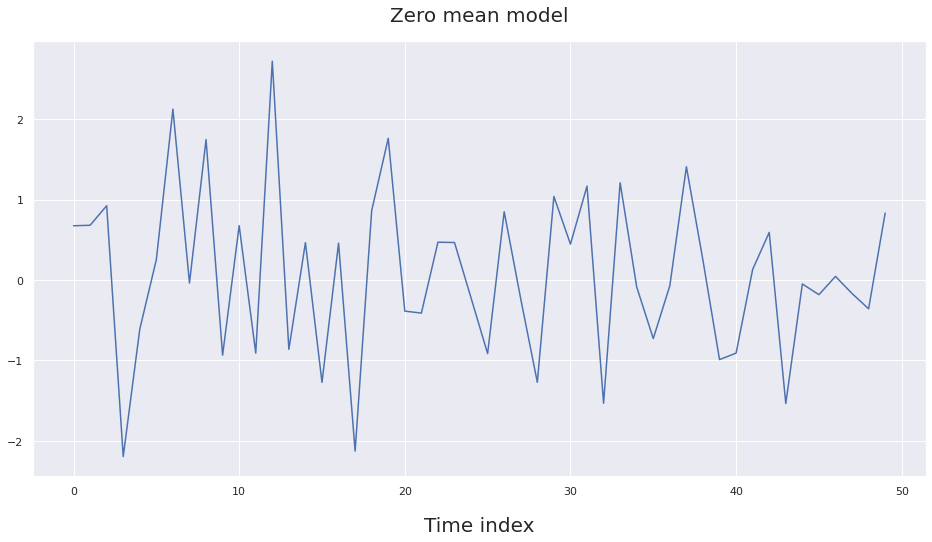

In [40]:
plt.figure(figsize =(16, 8))
g = sns.lineplot(data = zero_mean_series)
g.set_title('Zero mean model', size = 20, pad = 20)
g.set_xlabel('Time index', size = 20, labelpad = 20)
plt.show()

___________________________________________________________________________________________________________________


<h3> We an perfom a cummulated sum of the list then plot the data using a time series plot </h3>

In [41]:
random_walk = np.cumsum(zero_mean_series)
random_walk

array([ 0.67391019,  1.35406727,  2.27709058,  0.08127559, -0.53083855,
       -0.27663722,  1.84741946,  1.80892025,  3.55510573,  2.6196163 ,
        3.29554314,  2.38635505,  5.10694524,  4.24385547,  4.70777613,
        3.43384953,  3.89172154,  1.76365342,  2.62595317,  4.38747556,
        3.9998719 ,  3.58788321,  4.0574721 ,  4.52286187,  4.29871968,
        3.38313732,  4.23114238,  3.99418924,  2.72192604,  3.76023602,
        4.20596969,  5.3729847 ,  3.84006929,  5.04897267,  4.96169243,
        4.23318917,  4.16138127,  5.56947714,  5.8128886 ,  4.82231784,
        3.91270871,  4.04353252,  4.63469481,  3.09728171,  3.04791141,
        2.86469715,  2.90895903,  2.74054726,  2.38174292,  3.21388005])

Note that for any particular value the next value is the sum of the previous one

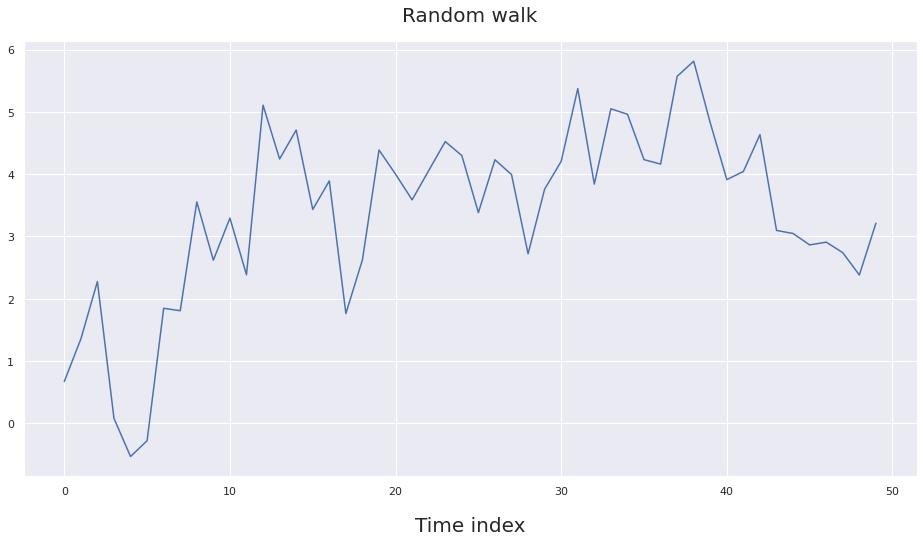

In [42]:
plt.figure(figsize = (16, 8))
g = sns.lineplot(data = random_walk)
g.set_title('Random walk', size = 20, pad = 20)
g.set_xlabel('Time index', size = 20, labelpad = 20)
plt.show()

# Note that if we plot the list using the time series it shows an interesting graph that shows the change in values 
# over time

# Univariate Time Series

* It's a scenario where a series of observations is captured for the <b>same variable</b> over a particular duration of time.

* In general, a univariate time series the observations are taken over regular time period, <b>such as the change in temperature over time throughout a day.</b>

# Performing Time Series Analysis with real data;

### TSA with Open Power System Data (Germany)

For this phase i'll use a real company's order data

In [43]:
# import and load the data

import pandas as pd
df = pd.read_csv('opsd_germany_daily.csv')
df.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

The columns of the dataframe are described here:

* **Date:** The date is in the format yyyy-mm-dd.
* **Consumption:** This indicates electricity consumption in GWh.
* **Wind:** This indicates wind power production in GWh.
* **Solar:** This indicates solar power production in GWh.
* **Wind + Solar:** This represents the sum of solar and wind power production in GWh.

----------------------------------------------------------------------------------------

**Note** the date column, which contains the time series dataset. We can use this dataset to discover how electricity consumption and production varies over time in Germany.

## Data Cleaning

Let's now clean our dataset for outliers:

In [44]:
# We can start by checking the shape of the dataset:

df.shape

(4383, 5)

The dataframe contains 4,383 rows and 5 columns.

In [45]:
# We can also check few entries inside the dataframe, last 10 entries

df.tail(10)

,Date,Consumption,Wind,Solar,Wind+Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [46]:
# Now let's review the data types of each column in our df dataframe:

df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

**Note** that the Date column has a data type of object. This is not correct So, the next step is to correct the Date column;

In [47]:
# Convert object to datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [48]:
# It should be converted but to verify;

df.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

:-]

In [49]:
# Next would be to change the dataframe index to the Date column:

df = df.set_index('Date')
df.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [50]:
# Or we can just check the index by;

df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Since our index is the DatetimeIndex object, now we can use it to analyze the dataframe. Let's add more columns to out dataframe to make our lives easier. Let's add Year, Month and Weekday Name;

In [51]:
# Add columns with Year, Month and Weekday names

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()

In [52]:
# Display a random sampling of 5 rows

df.sample(5)


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2013-06-12,1298.307,73.270,154.902,228.172,2013,6,Wednesday
2017-06-14,1369.960,67.958,230.836,298.794,2017,6,Wednesday
2014-05-20,1449.074,41.571,195.205,236.776,2014,5,Tuesday
2007-10-01,1418.342,NaN,NaN,NaN,2007,10,Monday
2012-03-22,1390.429,40.730,116.147,156.877,2012,3,Thursday


**Note** that we added three more columns -- Year, Month and Weekday Name. Adding these columns helps to make the analysis of data easier.

## Time-based indexing

Time-based indexing is a very powerful method of the pandas library when it comes to time series data. Having time-based indexing allows using a formatted string to select data.

In [53]:
df.loc['2015-10-02']

Consumption     1391.05
Wind             81.229
Solar           160.641
Wind+Solar       241.87
Year               2015
Month                10
Weekday Name     Friday
Name: 2015-10-02 00:00:00, dtype: object

**Note** that we used the pandas dataframe loc accessor. In the preceding example, we used a date as a string to select a row. We can use all sorts of techniques to acces rows just as we can do with a normal dataframe index.

## Visualizing time series

Let's visualize the time series dataset. We will continue using the same df dataframe

In [54]:
# The first step is to import the seaborn and matplotlib libraries:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize' : (11,4)})
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

<AxesSubplot:xlabel='Date'>

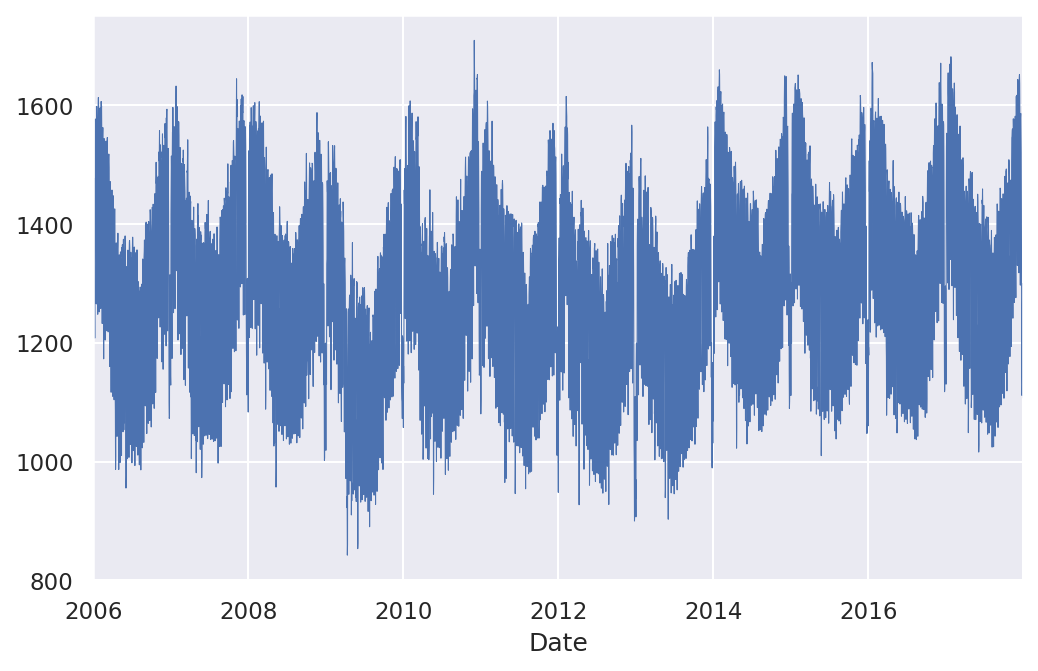

In [55]:
# Next, let's generate a line plot of the full time series of Germany's daily electricity consumption

df.Consumption.plot(linewidth = 0.5)

As depicted in the preceding screenshot, the y-axis  shows the electricity consumption and the x-axis shows the year. However, there are too many datasets to cover all the years.

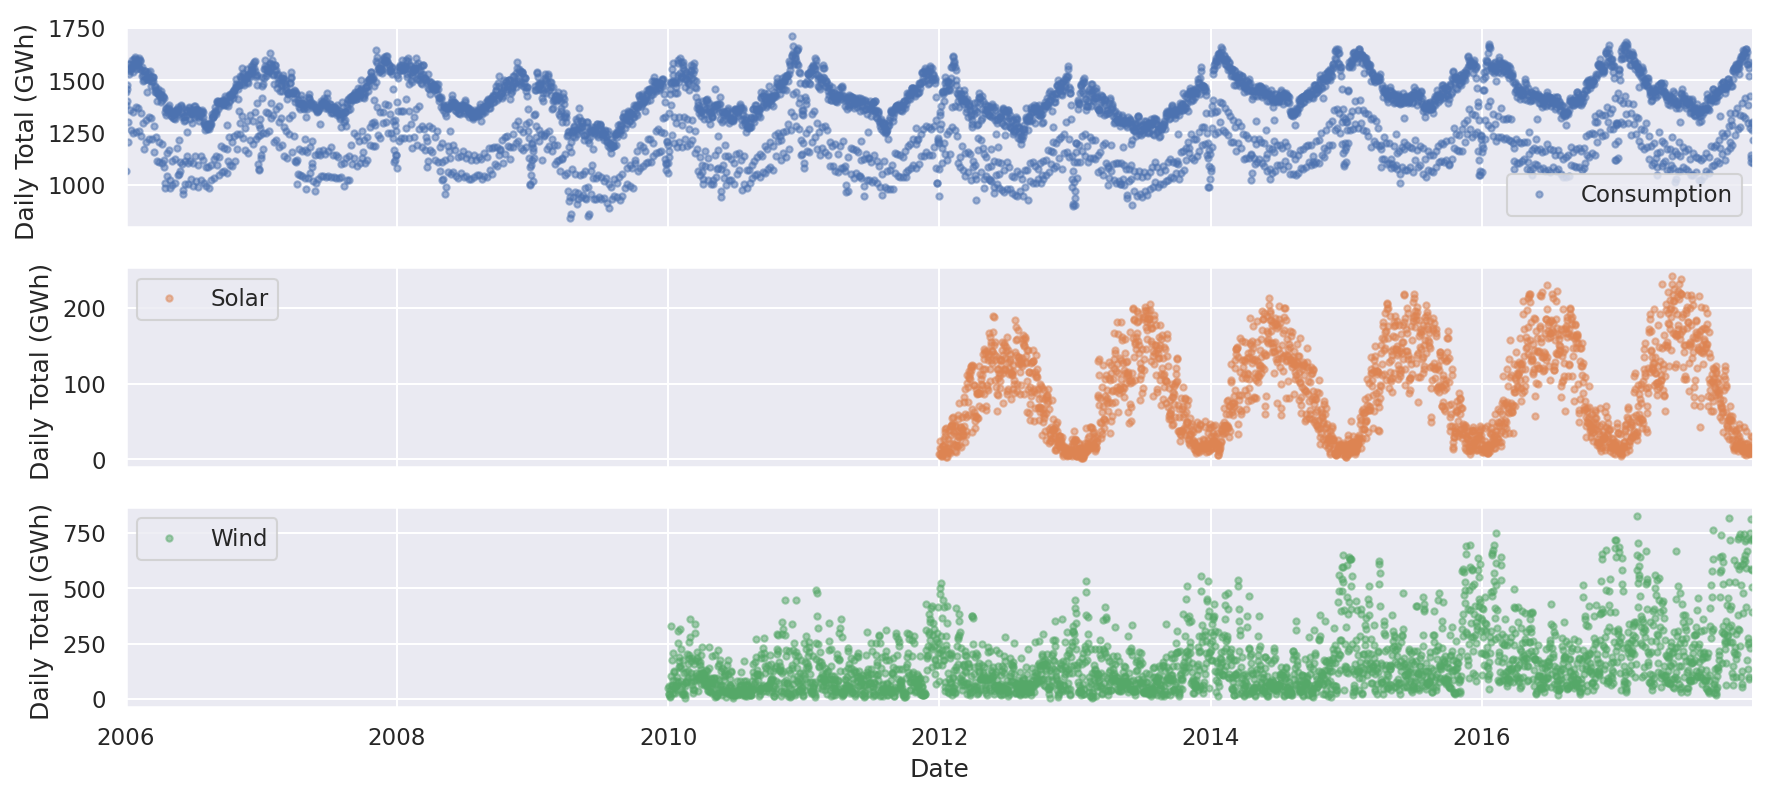

In [56]:
# Let's use the dots to plot the data for all the other columns:

cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df[cols_to_plot].plot(marker= '.', alpha=0.5, linestyle = 'None', figsize = (14,6), subplots = True)
for ax in axes:
    ax.set_ylabel('Daily Total (GWh) ')

#### The output shows that electricity consumption can be broken down into two distinct patterns:

* One cluster roughly from 1,400 GWh and above.
* Another cluster roughly below 1,400 GWh.

* Moreover, solar production is higher in summer and lower in winter. Over the years, there seems to have been a strong increasing trend in the output of wind power.


_______________________________________________________________________________________________________

We can further investigate a single year to have a closer look;

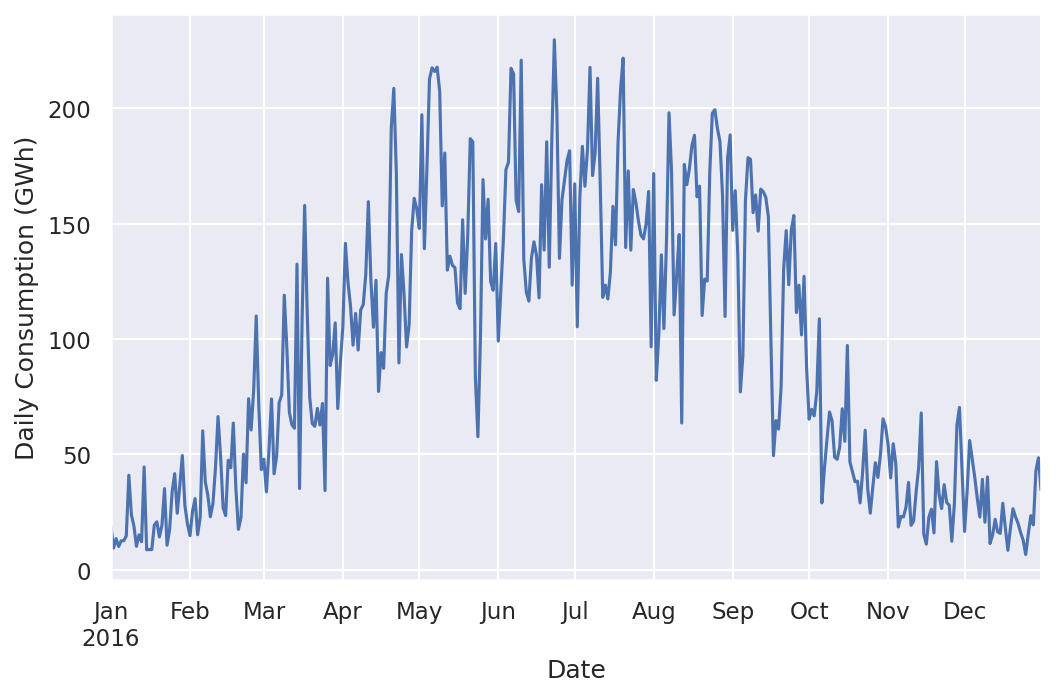

In [65]:
ax = df.loc['2016', 'Solar'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

Production of solar energy is actually higher in the summer than in winter

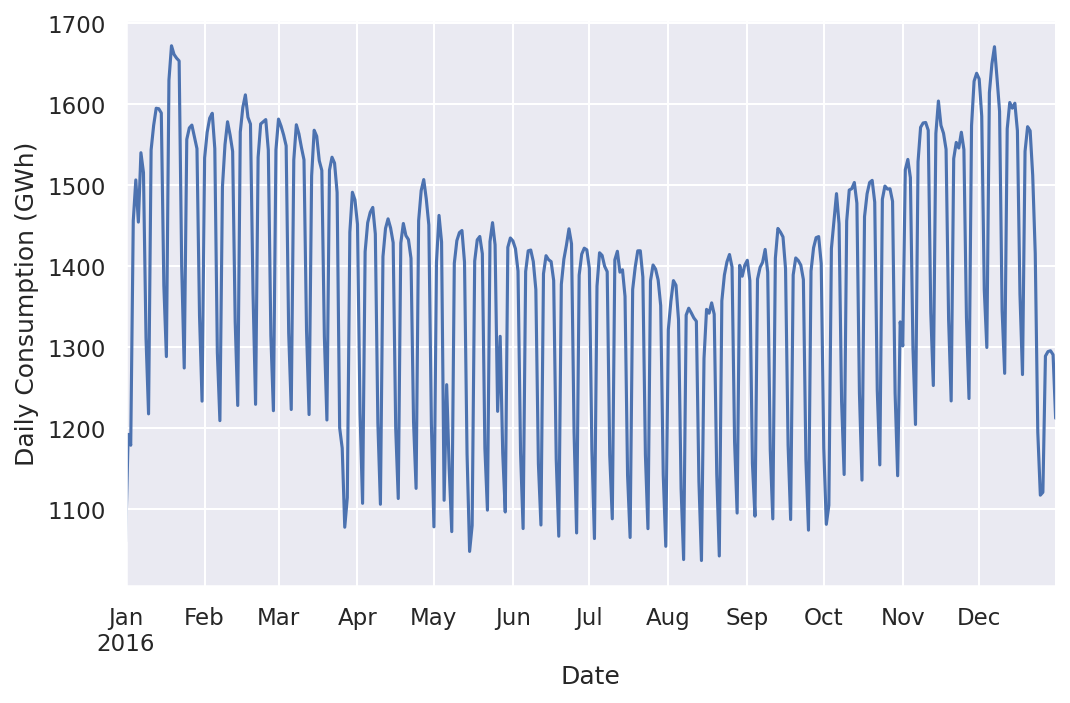

In [63]:
ax = df.loc['2016', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

From the preceding chart, we can see clearly the consumption of electricity for 2016. The graph shows a drastic decrease in the consumption of electricity at the end of the year (December) and during August. We can look for further details in any particular month. Let's examine the month of December 2016;

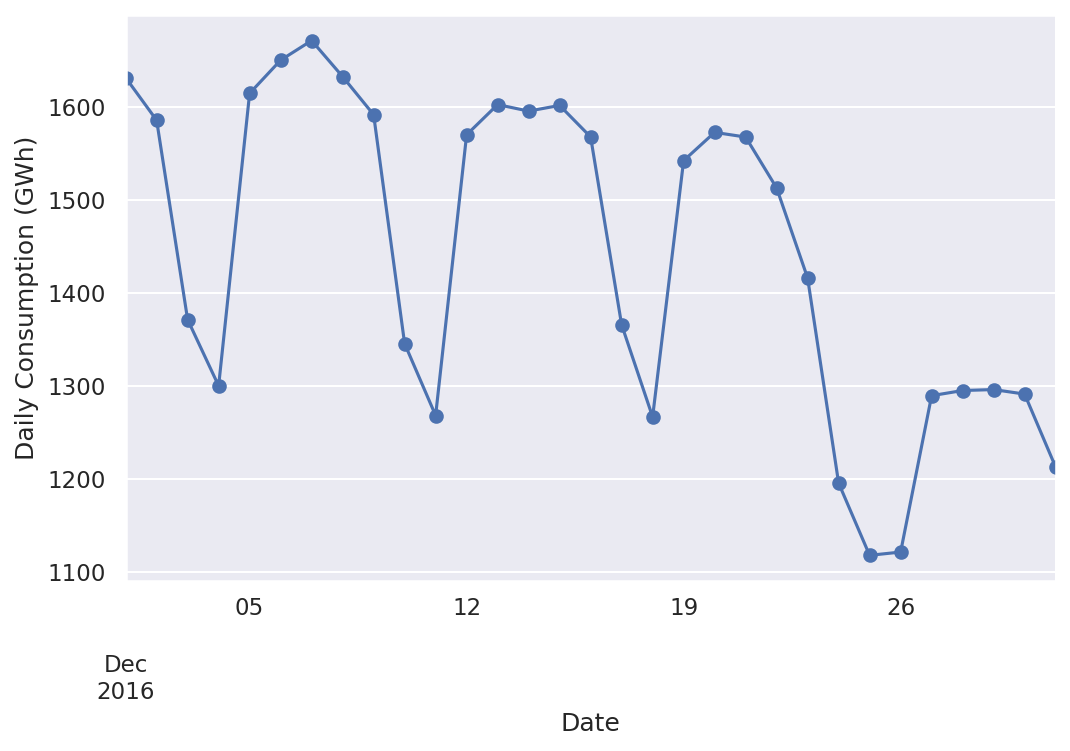

In [58]:
ax = df.loc['2016-12', 'Consumption'].plot(marker = 'o', linestyle = '-')
ax.set_ylabel('Daily Consumption (GWh)');

As shown in the preceding graph, electricity consumption is higher on weekdays and lowest at the weekends. We can see the consumption for each day of the month. We can zoom in further to see how consumption plays out in the last week of Decempter.


In order to indicate a particular week of December, we can supply a specific date range as shown here;



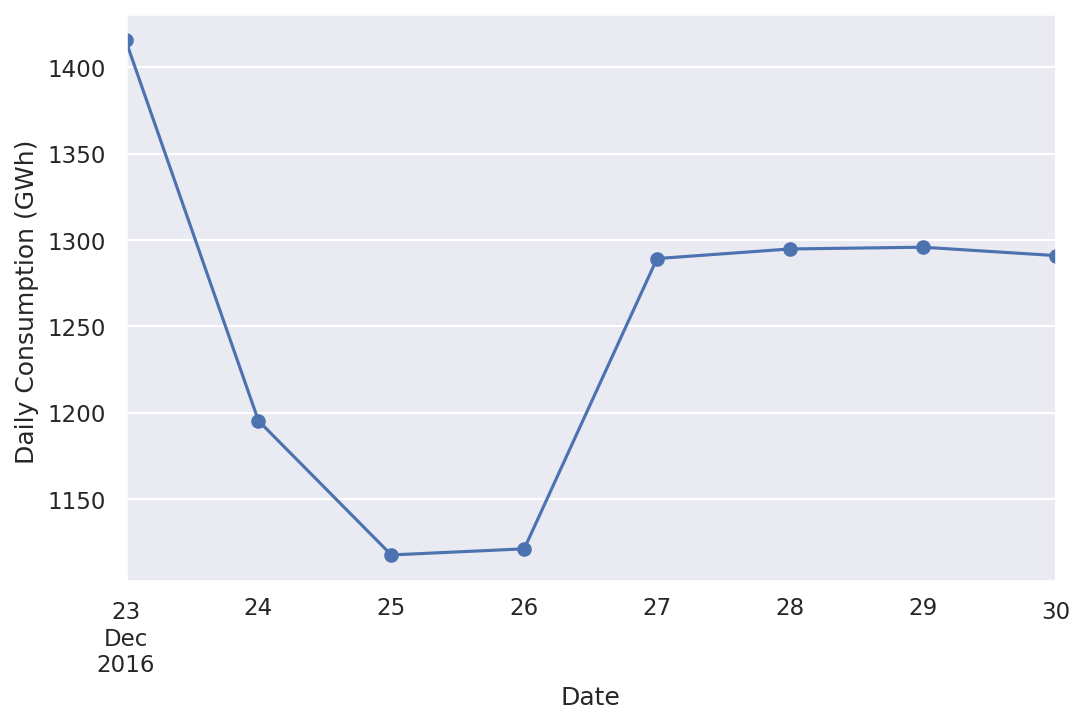

In [59]:
ax = df.loc['2016-12-23':'2016-12-30', 'Consumption'].plot(marker = 'o', linestyle = '-')
ax.set_ylabel('Daily Consumption (GWh) ');

As illustrated in the preceding graph, electricity consumption was lowest on the day of Christmas, probably because people were busy partying. After Christmas, the consumption increased.

## Grouping time series data

We can group the data by different time periods and present them in box plots:


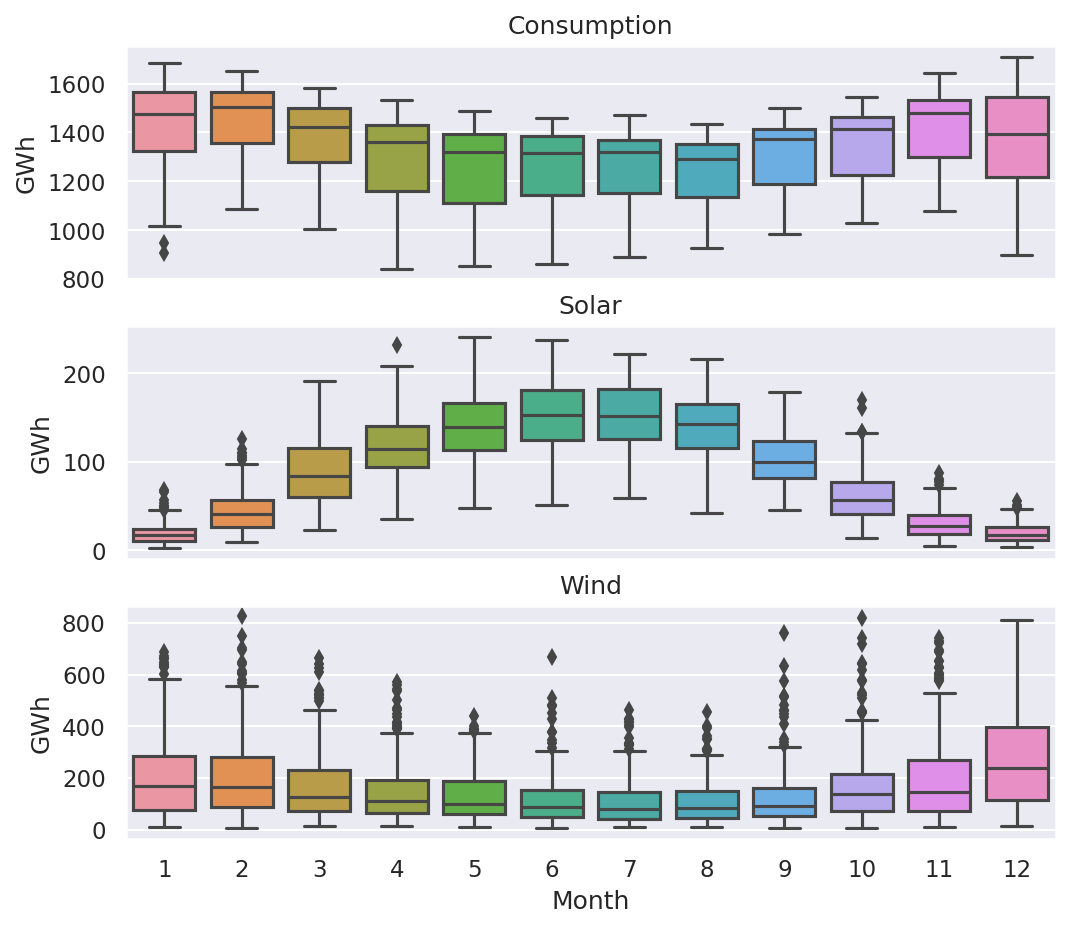

In [60]:
# We can first group the data by months and then use the box plots to visualize the data;

fig, axes = plt.subplots(3, 1, figsize = (8,7), sharex = True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data = df, x = 'Month', y = name, ax = ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

The preceding plot illustrates that electricity consumption is generally higher in
the winter and lower in the summer. Wind production is higher during the
summer. Moreover, there are many outliers associated with electricity
consumption, wind production, and solar production.

In [67]:
df.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'Weekday Name'],
      dtype='object')

### Next we can group the consumption by day of the week and present in a box plot

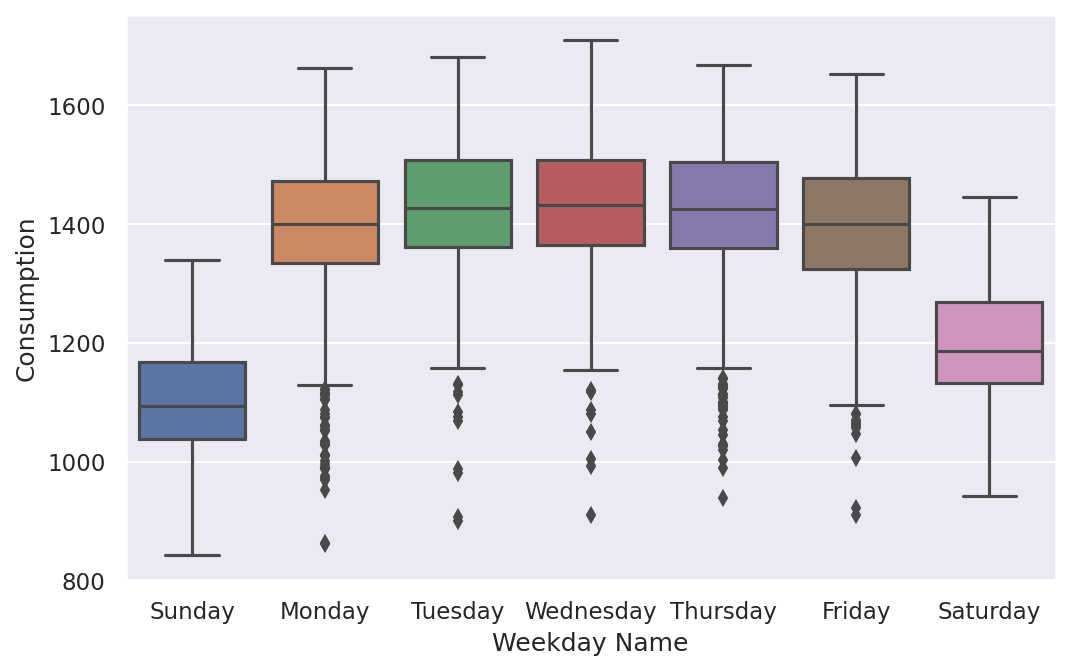

In [71]:
# using the seaborn package library

sns.boxplot(data=df, x = 'Weekday Name', y = 'Consumption');

### Resampling Time Series Data

It is often required to resample the dataset at lower or higher frequencies. This resampling
is done based on aggregation or grouping operations. For example, we can resample the
data based on the weekly mean time series as follows:

In [72]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

In [75]:
power_weekly_mean = df[columns].resample('W').mean()
power_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [76]:
# We can plot daily and weekly time to compare the dataset over the six-month period
# to see the last six months of 2016 we'll start by initializing the variable

start, end = '2016-01', '2016-06'

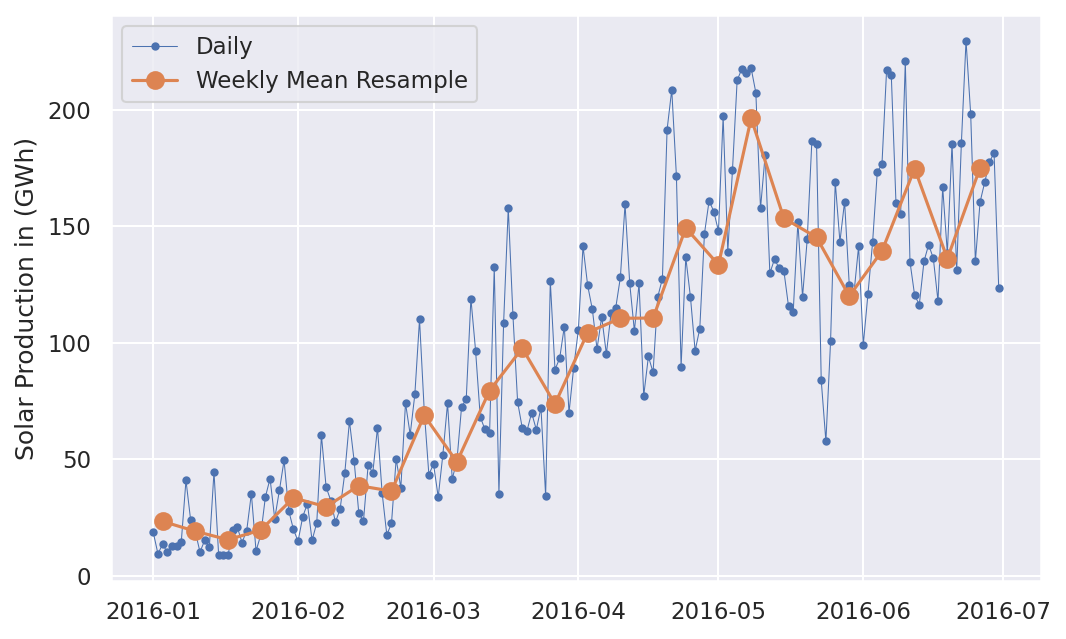

In [82]:
# plotting the graph

fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Solar'], marker ='.', linestyle='-', linewidth=0.5,label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production in (GWh)')
#plt.savefig('Daily_weekly_chart.png')
ax.legend();

The preceeding screenshot shows that the weekly mean time series is increasing over time and is much smoother than the daily time series

## - reference Suresh kumar mukhiya, Usman Ahmed - Hands on exploratory data analysis with python